In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import calendar

pd.set_option('display.max_columns', None) #mostrar todas as colunas
pd.set_option('display.max_rows', 50)  #mostrar no max 50 linhas
pd.set_option('display.max_colwidth', None)  #mostrar a grossura máxima das colunas

In [3]:
df = pd.read_excel('fake_dataset.xlsx')
df.to_csv('fake_dataset.csv')
df = pd.read_csv("fake_dataset.csv")
df = df.drop(columns =['Unnamed: 0','Unnamed: 0.1']) #ele cria essas colunas

In [4]:
df.shape

(700, 23)

In [5]:
df.head(2)

datebr            sku  offer_option_id  \
0  2022-08-01  LGPKG-1090219          2710823   
1  2022-08-01  LGPKG-1095820          2724406   

                                     offer_option_title  \
0                                    Aéreo de São Paulo   
1  Aéreo de Rio de Janeiro - 3 diárias + Ingresso 1 dia   

                                                                                                                                              offer_option_description  \
0                                                      Aéreo para Fortaleza | Quarto Duplo ou Triplo | 7 Diárias (3 diárias em Fortaleza + 4 diárias em Jericoacoara).   
1  Aéreo para Florianópolis, Navegantes ou Joinville | 3 diárias em Balneário Camboriú em Quarto Duplo ou Triplo | Ingresso de 1 dia para o Parque Beto Carrero World.   

                                                      product_name  \
0               Pacote de Viagem - Fortaleza + Jericoacoara - 2022   
1  Pacote de Viagem - Beto Carrero World - Segundo Semestre - 2023   

  destination_type  multidestino    year package_date_format  \
0              NAC         False  2022.0       Data flexível   
1              NAC         False  2023.0       Data flexível   

     destination_city destination_state destination_country  \
0        Jericoacoara             Ceará              Brasil   
1  Balneário Camboriú    Santa Catarina              Brasil   

                                                          AttributeList  \
0           Hospedagem Econômica,Café da manhã,Passagem Aérea Econômica   
1  Hospedagem Econômica,Café da manhã,Ingresso,Passagem Aérea Econômica   

   clicks  checkout  fullprice  yield  discount  realprice  interest  \
0   675.0     117.0       3470    660      1239       2891         0   
1  2010.0     443.0        624    125         0        749         0   

   totalprice  sales  
0        2891      1  
1         749      1

In [16]:
## I'm trying to answer the following question: how sales behave with day week? Which day sales the most?

In [34]:
#Add column with the day of the week
week_day = []
for i in range (df.shape[0]): 
    date = pd.Timestamp(df.iloc[i,0])
    week_day.append(date.day_name())
df['Week day'] = week_day

In [21]:
#No fake_dataset só tem segundas e tercas:
df['Week day'].value_counts()

Monday     499
Tuesday    201
Name: Week day, dtype: int64

<Axes: ylabel='sales'>

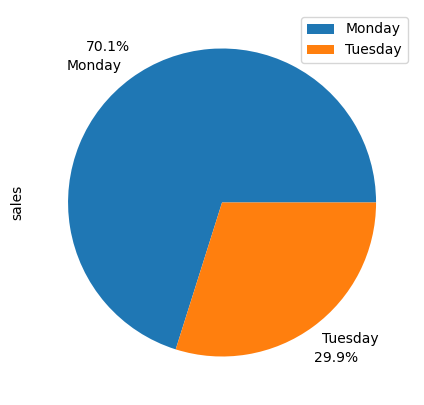

In [33]:
t = df.groupby(['Week day']).sum(['sales'])
plot2 = t.plot.pie(y='sales', figsize=(5, 5), autopct='%1.1f%%', pctdistance=1.25)
plot2

In [51]:
## I'm trying to answer the following question: how sales behave with day of month? Which day sales the most?

In [48]:
#Add column with days
day = []
for i in range (df.shape[0]): 
    date = pd.Timestamp(df.iloc[i,0])
    day.append(date.to_pydatetime().day)
df['day'] = day

<Axes: ylabel='sales'>

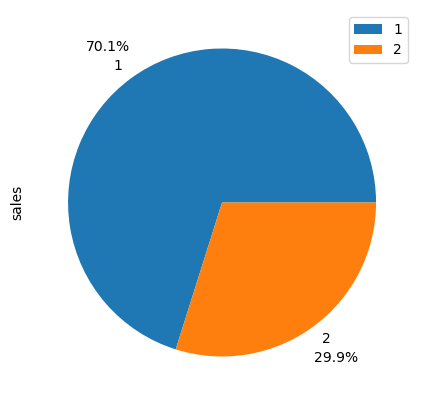

In [50]:
u = df.groupby(['day']).sum(['sales'])
plot1 = u.plot.pie(y='sales', figsize=(5, 5), autopct='%1.1f%%', pctdistance=1.25)
plot1

In [74]:
u = dict(df['destination_type'].value_counts())

In [75]:
#Group by destination_type and sum the column sales
i = dict(df.groupby('destination_type').sum()['sales'])

C:\Users\user\AppData\Local\Temp\ipykernel_13560\58718615.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  i = dict(df.groupby('destination_type').sum()['sales'])


In [76]:
i

{'INT': 790, 'NAC': 1671}

In [78]:
total_sales = df['sales'].sum()

In [82]:
prop_sales_nac = list(i.values())[1]/total_sales
prop_sales_int = list(i.values())[0]/total_sales

In [80]:
i.values()

dict_values([790, 1671])

In [83]:
prop_sales_int

0.321007720438846

In [84]:
prop_sales_nac

0.678992279561154

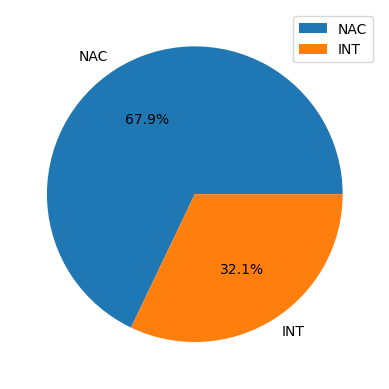

In [96]:
prop_sales = [prop_sales_nac, prop_sales_int]
labels = ["NAC", "INT"]
plt.pie(prop_sales, autopct='%1.1f%%', labels = labels)
plt.legend()
plt.show()

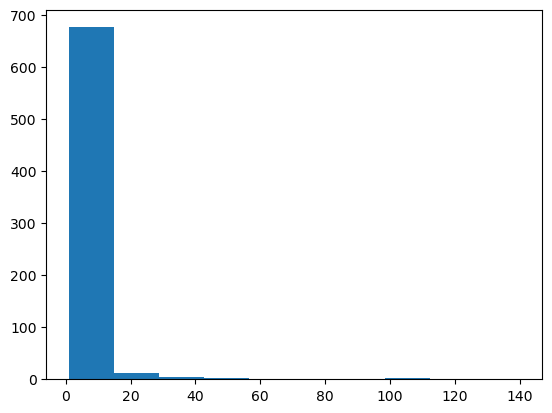

In [109]:
plt.hist(df['sales'], bins = 10)
plt.show()

In [111]:
#Reding the rows which name contains mega
df2 = df.loc[df['product_name'].str.contains('All')]

In [112]:
df2.shape

(47, 26)

In [114]:
## Em torno de 3% das vendas é de pacotes all inclusive:
df2['sales'].sum()/total_sales

0.03941487200325071

In [115]:
## O QUE FALTA: ENTENDER A DISTRIBUIÇÃO DISSO!

In [ ]:
## I'm trying to understand: given an id, whats the range of realprice?

In [14]:
df3 = df[df['offer_option_id']==2782430]

In [39]:
df3.shape

(13, 23)

In [15]:
df3.head(5)

datebr            sku  offer_option_id  \
167  2022-08-01  LGPKG-1141722          2782430   
168  2022-08-01  LGPKG-1141722          2782430   
169  2022-08-01  LGPKG-1141722          2782430   
171  2022-08-01  LGPKG-1141722          2782430   
173  2022-08-01  LGPKG-1141722          2782430   

                 offer_option_title  \
167  Aéreo de São Paulo - 6 diárias   
168  Aéreo de São Paulo - 6 diárias   
169  Aéreo de São Paulo - 6 diárias   
171  Aéreo de São Paulo - 6 diárias   
173  Aéreo de São Paulo - 6 diárias   

                                                                                          offer_option_description  \
167  Aéreo para Recife | Quarto Duplo ou Triplo | 6 Diárias (3 diárias em Recife + 3 diárias em Porto de Galinhas)   
168  Aéreo para Recife | Quarto Duplo ou Triplo | 6 Diárias (3 diárias em Recife + 3 diárias em Porto de Galinhas)   
169  Aéreo para Recife | Quarto Duplo ou Triplo | 6 Diárias (3 diárias em Recife + 3 diárias em Porto de Galinhas)   
171  Aéreo para Recife | Quarto Duplo ou Triplo | 6 Diárias (3 diárias em Recife + 3 diárias em Porto de Galinhas)   
173  Aéreo para Recife | Quarto Duplo ou Triplo | 6 Diárias (3 diárias em Recife + 3 diárias em Porto de Galinhas)   

                                           product_name destination_type  \
167  Pacote de Viagem Recife + Porto de Galinhas - 2023              NAC   
168  Pacote de Viagem Recife + Porto de Galinhas - 2023              NAC   
169  Pacote de Viagem Recife + Porto de Galinhas - 2023              NAC   
171  Pacote de Viagem Recife + Porto de Galinhas - 2023              NAC   
173  Pacote de Viagem Recife + Porto de Galinhas - 2023              NAC   

     multidestino    year package_date_format destination_city  \
167         False  2023.0       Data flexível           Recife   
168         False  2023.0       Data flexível           Recife   
169         False  2023.0       Data flexível           Recife   
171         False  2023.0       Data flexível           Recife   
173         False  2023.0       Data flexível           Recife   

    destination_state destination_country  \
167        Pernambuco              Brasil   
168        Pernambuco              Brasil   
169        Pernambuco              Brasil   
171        Pernambuco              Brasil   
173        Pernambuco              Brasil   

                                                   AttributeList   clicks  \
167  Hospedagem Econômica,Café da manhã,Passagem Aérea Econômica  14741.0   
168  Hospedagem Econômica,Café da manhã,Passagem Aérea Econômica  14741.0   
169  Hospedagem Econômica,Café da manhã,Passagem Aérea Econômica  14741.0   
171  Hospedagem Econômica,Café da manhã,Passagem Aérea Econômica  14741.0   
173  Hospedagem Econômica,Café da manhã,Passagem Aérea Econômica  14741.0   

     checkout  fullprice  yield  discount  realprice  interest  totalprice  \
167    4610.0        699      0       140        559         0         559   
168    4610.0        699      0       140        559        42         601   
169    4610.0        699      0       140        559        53         612   
171    4610.0        699      0       140        559        64         623   
173    4610.0        699      0       140        559       224         783   

     sales  
167    140  
168      1  
169      8  
171      9  
173      1

In [31]:
o = dict(df['offer_option_id'].value_counts())

In [37]:
len(o)

326

In [19]:
price_var = df3['totalprice'].max() - df3['totalprice'].min()

In [21]:
total_sales = df3['sales'].sum()

In [63]:
ids = list(o.keys())
ids

[2782430,
 2780997,
 2779137,
 2782432,
 2782429,
 2780573,
 2777664,
 2777019,
 2724406,
 2777663,
 3042323,
 2781871,
 2898800,
 2777948,
 2782617,
 2777020,
 2785538,
 3034930,
 2780996,
 2724407,
 2780572,
 2779874,
 2777665,
 2779873,
 2780197,
 2989050,
 2782618,
 3030560,
 2782433,
 2781870,
 3030564,
 2779861,
 2724409,
 2782944,
 2782943,
 2779315,
 2773088,
 2776312,
 2989049,
 3035914,
 2769024,
 2777018,
 3003947,
 3035863,
 2776984,
 3035644,
 3034931,
 2898801,
 2776691,
 3034927,
 2772076,
 3035645,
 3003910,
 2782675,
 2782582,
 2989053,
 2989041,
 2724408,
 2989054,
 2780308,
 2780309,
 2989045,
 2989046,
 2779316,
 2777947,
 2777668,
 2776983,
 3033392,
 2779136,
 2777021,
 3034932,
 3032675,
 3031382,
 2776185,
 3030565,
 2777666,
 2780476,
 2777667,
 2785537,
 2782431,
 3042324,
 2778975,
 2778976,
 2776186,
 2785783,
 2786346,
 2786345,
 3035894,
 2786343,
 2786550,
 2786551,
 2897079,
 3043794,
 3035991,
 3035992,
 3035981,
 3043793,
 3032847,
 3031530,
 3031383,


In [67]:
price_var = []
total_sales = []
for i in ids:
    df4 = df[df['offer_option_id'] == i]
    price_var4 = df4['totalprice'].max() - df4['totalprice'].min()
    total_sales4 = df4['sales'].sum()
    price_var.append(price_var4)
    total_sales.append(total_sales4)

In [74]:
novo_df = pd.DataFrame({'offer_id': ids, 'total_sales' : total_sales, 'price_var' : price_var})

In [75]:
novo_df.head()

offer_id  total_sales  price_var
0   2782430          286        358
1   2780997           46        700
2   2779137           16        515
3   2782432           71        414
4   2782429          240        358

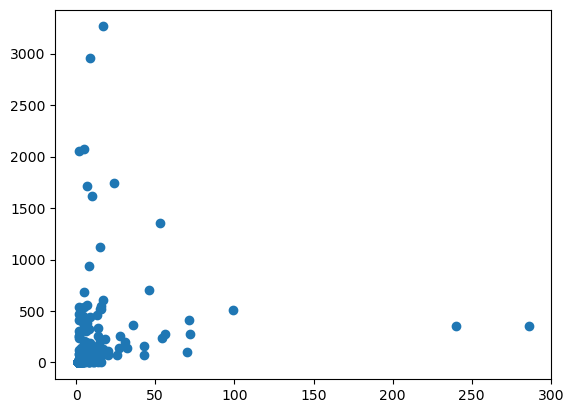

In [77]:
plt.scatter(novo_df['total_sales'], novo_df['price_var'])

In [62]:
novo_df.head(5)

price_var  total_sales
2782430          0            1
2780997          0            1
2779137          0            1
2782432          0            1
2782429          0            1

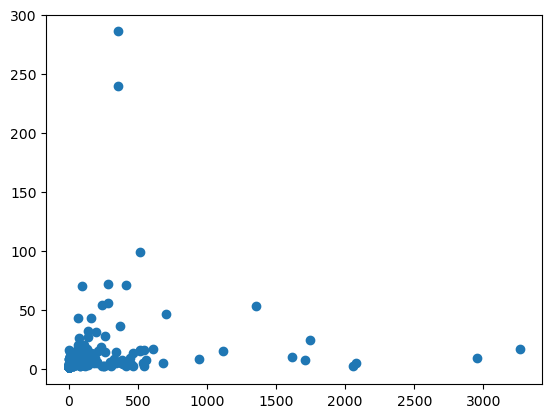

In [78]:
plt.scatter(novo_df['price_var'],novo_df['total_sales'])